<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [15]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [17]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [18]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Visualization

## Q1: For the "Median value of owner-occupied homes" provide a boxplot.

Text(0.5, 1.0, 'Median value of owner-occupied homes')

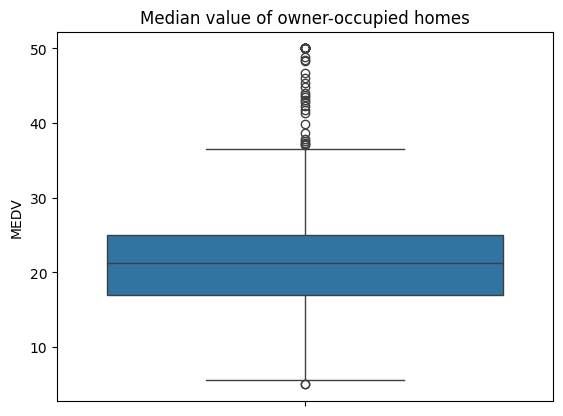

In [48]:
ax1 = sns.boxplot(y="MEDV", data = boston_df)
ax1.set_title("Median value of owner-occupied homes") 

# We have median value of aproximatelly 20. There is a great amount of high value owner-occupied homes that goes beyond the maximun. Only 1 value unde minimun.

## Q2: Provide a  bar plot for the Charles river variable

Text(0.5, 0.98, 'Charles River')

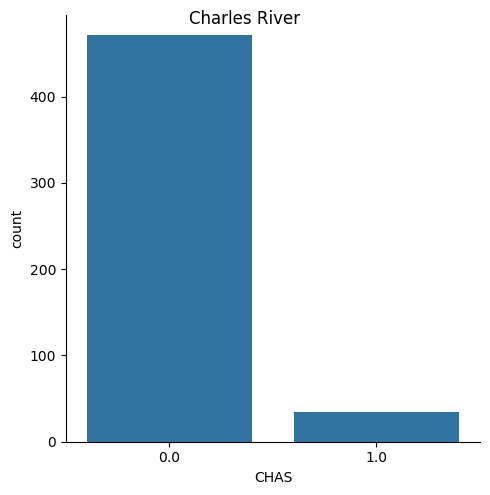

In [51]:
ax2=sns.catplot(x= "CHAS", kind="count", data= boston_df , legend = False)
ax2.fig.suptitle("Charles River")

# We have only a small amount that tract bounds river.

## Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

In [29]:
# We discretize the age variable first.

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

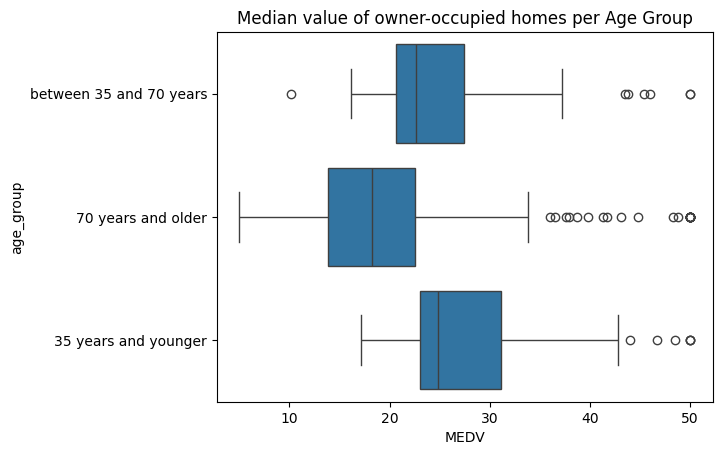

In [52]:
ax3 =sns.boxplot(x= "MEDV", y= "age_group", data = boston_df)
ax3.set_title("Median value of owner-occupied homes per Age Group")

## Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide conc vs proportion of non- retail business acres per town')

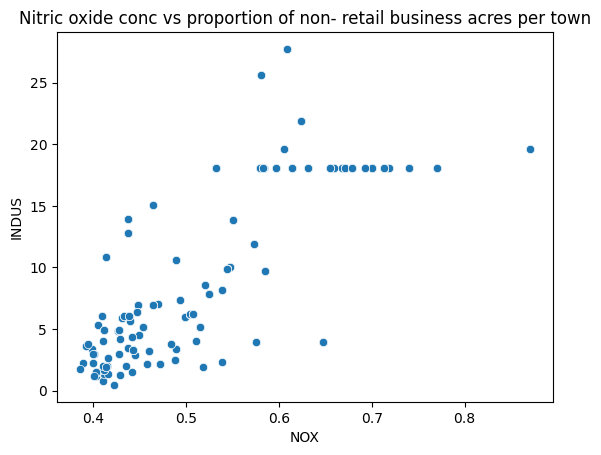

In [31]:
ax=sns.scatterplot(x="NOX", y="INDUS", data= boston_df)
ax.set_title("Nitric oxide conc vs proportion of non- retail business acres per town")

 The bottom left part indicates a strong correlation between INDUS and NOX. The higher the proportion of non retail business acres per town the higher we get higher concentration of nitric oxide.

## Q5: Create a histogram for the pupil to teacher ratio variable. 

Text(0.5, 0.98, 'Pupil to teacher ratio')

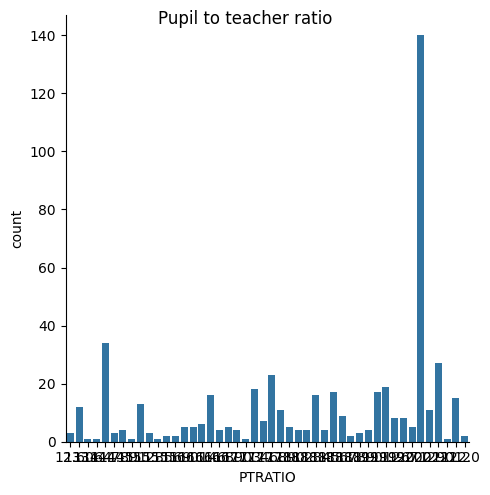

In [54]:
ax3= sns.catplot(x="PTRATIO", kind="count", data= boston_df )
ax3.fig.suptitle("Pupil to teacher ratio")

We can see a high amount of pupil ratio on the end of the graph. That means that on teacher has most of the students.

# STATISTICAL TEST

## Q6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples).

Hypothesis:

H_0: There are not significant differences in median value between houses bounded and not bounded by the Charles River.

H_1: There are significant differences in median value between houses bounded and not bounded by the Charles River.

CHAS == 0 is FAR , CHAS == 1 is near

In [44]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS']== 1 ]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

## CONCLUSION 

p-value < 0.05 therefore we reject H_0 and there is statiscal significance in  median value between houses near the Charles RIver and houses far away from the river.

## Q7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

H_0: There is no difference in MEDV for each proportion of owner occupied unit prior to 1940.

H_1: There is difference in MEDV for each proportion of owner occupied unit prior to 1940.


In [45]:
# We will use regression to get two tailed ANOVA table.

from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


## CONCLUSION 

p-values < 0.05 therefore we reject H_0 and there is a difference in MEDV for each proportion of owner occupied unit prior to 1940.

## Q8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation).

Hypothesis:

H_0: There isn't a relationship between Nitric oxide concentrations and proportion of non-retail business acre per town.

H_1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acre per town.


In [46]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

## CONCLUSION 

As our p-value < 0.05 we reject H_0 and we conclude that there is a correlation between concentrations of nitric oxide and proportion of non_retail business acres per town.

## Q9: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis).

In [47]:
x=boston_df["DIS"]
y=boston_df["MEDV"]

x= sm.add_constant(x)

model = sm.OLS(y,x).fit()
predict = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        11:36:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CONCLUSION 

The coef dist of  1.0916 indicate that an additional weighted distance increases the median value of home owner occupied homes by 1.0916.